<a href="https://colab.research.google.com/github/CUNY-SPS-Data-Science-Program/your-bio-mianshariq/blob/main/Assignment%206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import zipfile
import io

import matplotlib.pyplot as plt
import requests
import seaborn as sns
import os
import geopandas as gpd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)


In [42]:
states = pd.read_csv('https://github.com/mianshariq/Datasets/raw/33be05ad7fc18499594c724479b3c4cf8c268593/title_data.csv')
food_sec = pd.read_csv('https://github.com/mianshariq/Datasets/raw/ee942c6645d11a11230b9b8bbe0010e737172b33/mapdata2022.csv')
food_sec.rename(columns={'State': 'Abbreviation'}, inplace=True)
states=states[['Abbreviation','State']]
food_sec=food_sec.merge(states, on='Abbreviation', how='left')
data=gpd.read_file('https://github.com/mianshariq/Datasets/raw/dd792f49b511bdb836371df436cdb05b5730667a/gz_2010_us_040_00_500k_V2.json')
data.rename(columns={'NAME': 'State'}, inplace=True)
data=data.merge(food_sec, on='State', how='inner')

In [43]:
data.tail()

,GEO_ID,STATE,State,LSAD,CENSUSAREA,geometry,Abbreviation,Number of households,Interviewed,Food insecurity,Very low food security
46,0400000US46,46,South Dakota,,75811.000,"POLYGON ((-96.44341 42.48949, -96.45971 42.486...",SD,"369,000","1,172",8.9,3.4
47,0400000US50,50,Vermont,,9216.657,"POLYGON ((-72.04008 44.15575, -72.04271 44.152...",VT,"286,000","1,547",8.0,2.7
48,0400000US51,51,Virginia,,39490.086,"MULTIPOLYGON (((-76.04653 37.95359, -76.04169 ...",VA,"3,434,000","1,757",9.3,4.1
49,0400000US54,54,West Virginia,,24038.210,"POLYGON ((-81.96830 37.53780, -81.96540 37.541...",WV,"746,000","1,836",14.2,4.7
50,0400000US56,56,Wyoming,,97093.141,"POLYGON ((-109.05008 41.00066, -109.17368 41.0...",WY,"233,000","1,438",11.4,4.6


In [44]:
url= 'https://api.census.gov/data/2017/acs/acs1/subject?'
#ziptodist=pd.read_csv("ZiptoDist.csv",encoding='latin1')
get='get=NAME,'
columns = 'S1701_C01_001E,S1701_C03_001E,S1701_C03_002E,S1701_C03_011E,S1701_C03_012E,S1701_C03_013E,S1701_C03_014E,S1701_C03_015E,S1701_C03_016E,S1701_C03_017E,S1701_C03_018E,S1701_C03_019E,S1701_C03_020E,S1701_C03_021E,S1701_C03_003E,S1701_C03_004E,S1701_C03_007E,S1701_C03_008E,S1701_C03_010E,S2201_C04_001E,S1702_C01_044E'
state = '&for=state:01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58'
apikey = '&key=444a2e2450aaf00511136da7f3b8ae7b837d50b4'
query_url=f"{url}{get}{columns}{state}{apikey}"
response = requests.get(query_url, verify=True)
df=pd.read_csv(io.StringIO(response.text))

In [45]:
columns_names=["State",
"Population",
"Per_below_poverty_level",
"Children_0-17_Years",
"Male",
"Female",
"White_Alone",
"Black_Or_Afr_Amer",
"American_Indian_Native",
"Asian",
"Native_Hawian_Pacific_Ilander",
"Some_Other_race",
"Two_Or_More_Race",
"Hispanic_Latino_Any_Race",
"White_Alone,Not_hispanic_latino",
"<5_years",
"5-18_years",
"18-34_years",
"35-64_years",
">65_years",
"House_Hold_Rec_Food_Stamps",
"Famlies<125_per_poverty_level",

"State_Number",
"NA"]
df.set_axis(columns_names, axis='columns', inplace=True)
df['State']=df['State'].str.replace("[","")
df['State']=df['State'].str.replace('"','')
df['State']=df['State'].apply(lambda x: str(x))
data=data.merge(df, on='State', how='inner')

<ipython-input-45-3993029c1c21>:26: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(columns_names, axis='columns', inplace=True)
<ipython-input-45-3993029c1c21>:27: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['State']=df['State'].str.replace("[","")


In [46]:
votes=pd.read_csv('https://github.com/mianshariq/Datasets/raw/eea22863d89258abfe71cc69871a248c0373eda8/Popular%20vote%20backend.csv')
data=data.merge(votes, on='State', how='inner')

In [70]:
df_sorted = data.sort_values(by='Per_below_poverty_level', ascending=False)

<ipython-input-71-c53573cedf19>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=df_sorted['State'], y=df_sorted['Per_below_poverty_level'], palette="viridis", ci=None, edgecolor=None)


Text(0.5, 1.0, 'Sex Groups')

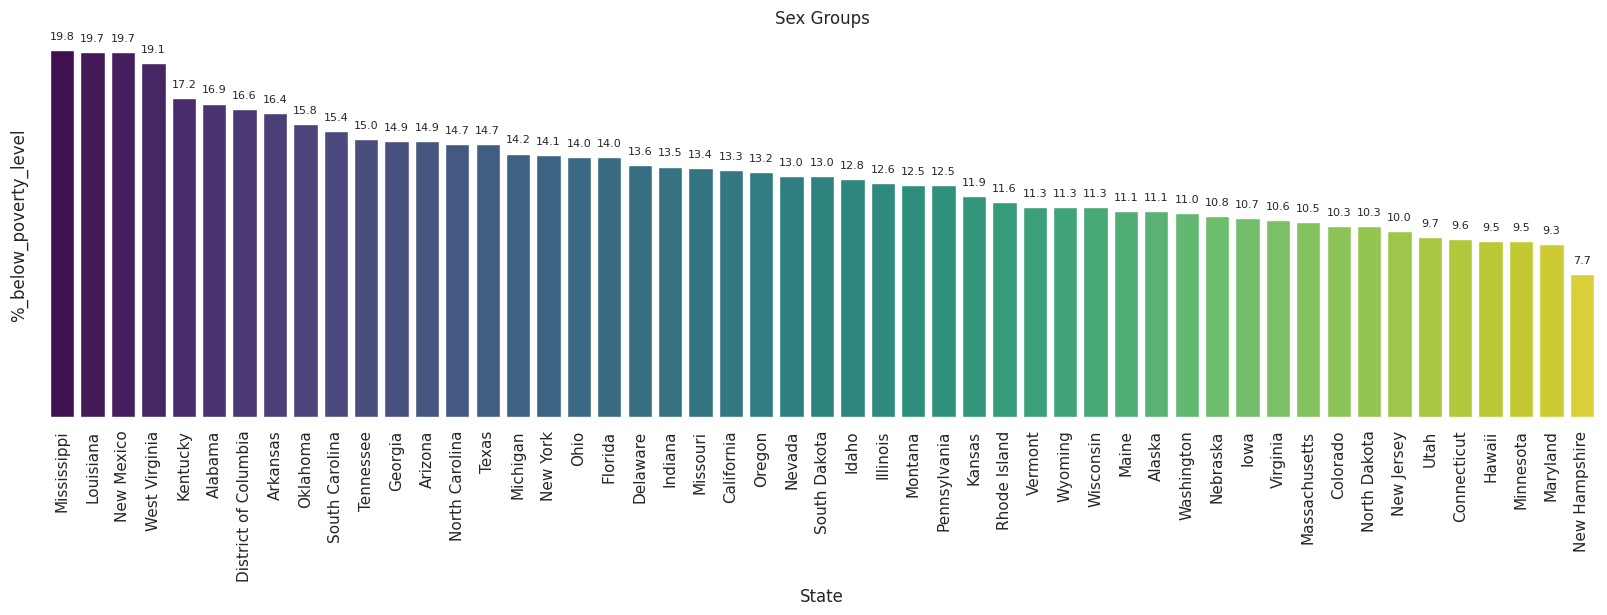

In [71]:

plt.figure(figsize=(20, 5))
sns.set_theme(style="whitegrid")

# Create a bar plot with annotations
ax = sns.barplot(x=df_sorted['State'], y=df_sorted['Per_below_poverty_level'], palette="viridis", ci=None, edgecolor=None)
sns.despine(left=True, bottom=True)

for p in ax.patches:
    ax.annotate(f'{round(p.get_height(), 2)}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

ax.set(yticklabels=[])
ax.yaxis.grid(False)

# Add labels and title
plt.xticks(rotation=90)
plt.ylabel('%_below_poverty_level')
plt.title('Sex Groups')

In [72]:
df_sorted = df_sorted.sort_values(by='Food insecurity            ', ascending=False)

<ipython-input-73-28f9f4f7e230>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=df_sorted['State'], y=df_sorted['Food insecurity            '], palette="viridis",ci=None, edgecolor=None)


Text(0.5, 1.0, 'Sex Groups')

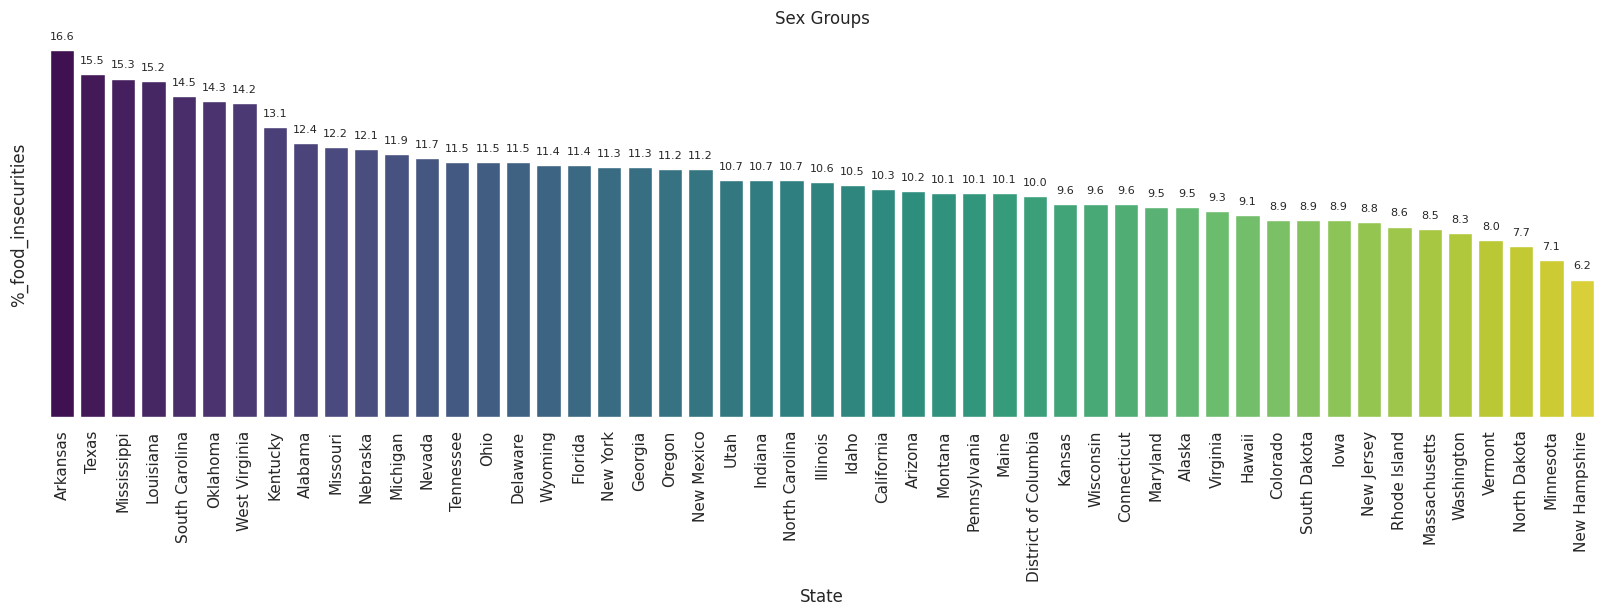

In [73]:

plt.figure(figsize=(20, 5))
sns.set_theme(style="whitegrid")

# Create a bar plot with annotations
ax = sns.barplot(x=df_sorted['State'], y=df_sorted['Food insecurity            '], palette="viridis",ci=None, edgecolor=None)
sns.despine(left=True, bottom=True)

for p in ax.patches:
    ax.annotate(f'{round(p.get_height(), 2)}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

ax.set(yticklabels=[])
ax.yaxis.grid(False)

# Add labels and title
plt.xticks(rotation=90)
plt.ylabel('%_food_insecurities')
plt.title('Sex Groups')

<ipython-input-81-4015a36fb0ef>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=df_sorted['State'], y=df_sorted['Very low food security'], palette="viridis",ci=None, edgecolor=None)


Text(0.5, 1.0, 'Sex Groups')

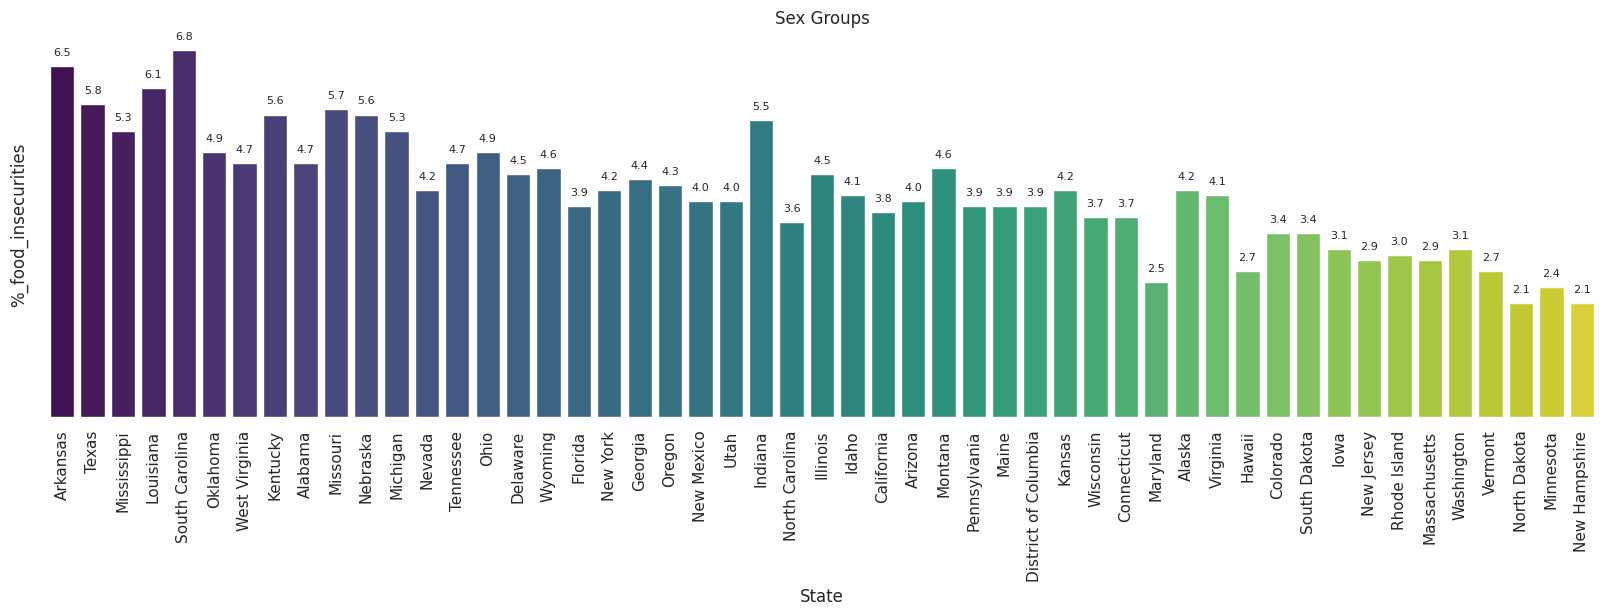

In [81]:

plt.figure(figsize=(20, 5))
sns.set_theme(style="whitegrid")

# Create a bar plot with annotations
ax = sns.barplot(x=df_sorted['State'], y=df_sorted['Very low food security'], palette="viridis",ci=None, edgecolor=None)
sns.despine(left=True, bottom=True)

for p in ax.patches:
    ax.annotate(f'{round(p.get_height(), 2)}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

ax.set(yticklabels=[])
ax.yaxis.grid(False)

# Add labels and title
plt.xticks(rotation=90)
plt.ylabel('%_food_insecurities')
plt.title('Sex Groups')


In [82]:
df_sorted.head()

,GEO_ID,STATE,State,LSAD,CENSUSAREA,geometry,Abbreviation,Number of households,Interviewed,Food insecurity,Very low food security,Population,Per_below_poverty_level,Children_0-17_Years,Male,Female,White_Alone,Black_Or_Afr_Amer,American_Indian_Native,Asian,Native_Hawian_Pacific_Ilander,Some_Other_race,Two_Or_More_Race,Hispanic_Latino_Any_Race,"White_Alone,Not_hispanic_latino",<5_years,5-18_years,18-34_years,35-64_years,>65_years,House_Hold_Rec_Food_Stamps,Famlies<125_per_poverty_level,State_Number,NA,Party
20,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.55929 36.49950, -94.51948 36.499...",AR,"1,290,000","1,748",16.6,6.5,2916321,16.4,22.5,15.1,17.6,13.6,27.6,25.7,13.5,36.2,27.6,18.6,23.2,13.3,24.5,21.7,19.9,13.3,10.2,11.8,122355,05],NaN,R
12,0400000US48,48,Texas,,261231.711,"MULTIPOLYGON (((-97.13436 27.89633, -97.13360 ...",TX,"11,069,000","4,953",15.5,5.8,27676343,14.7,20.9,13.3,16.1,13.9,19.0,17.9,9.8,22.5,20.3,15.0,20.7,8.5,22.8,20.2,16.3,10.7,10.8,12.0,1061632,48],NaN,R
37,0400000US28,28,Mississippi,,46923.274,"MULTIPOLYGON (((-88.71072 30.25080, -88.65680 ...",MS,"1,193,000","2,026",15.3,5.3,2889851,19.8,26.9,17.5,21.9,12.1,31.3,36.1,17.2,-999999999.0,25.2,20.9,21.6,11.9,26.8,27.0,23.7,15.4,13.7,15.3,143660,28],NaN,R
35,0400000US22,22,Louisiana,,43203.905,"MULTIPOLYGON (((-88.86507 29.75271, -88.88975 ...",LA,"1,881,000","2,151",15.2,6.1,4553037,19.7,28.0,17.7,21.7,12.5,33.1,24.7,15.9,-999999999.0,36.2,18.5,25.1,12.2,32.2,26.4,23.0,15.6,12.0,16.4,217505,22],NaN,R
45,0400000US45,45,South Carolina,,30060.696,"POLYGON ((-78.54109 33.85111, -78.55394 33.847...",SC,"2,196,000","1,527",14.5,6.8,4882720,15.4,22.6,13.9,16.8,11.2,24.3,32.4,12.7,-999999999.0,28.7,23.8,26.5,10.5,24.3,22.0,18.2,12.5,9.2,12.3,196946,45],NaN,R


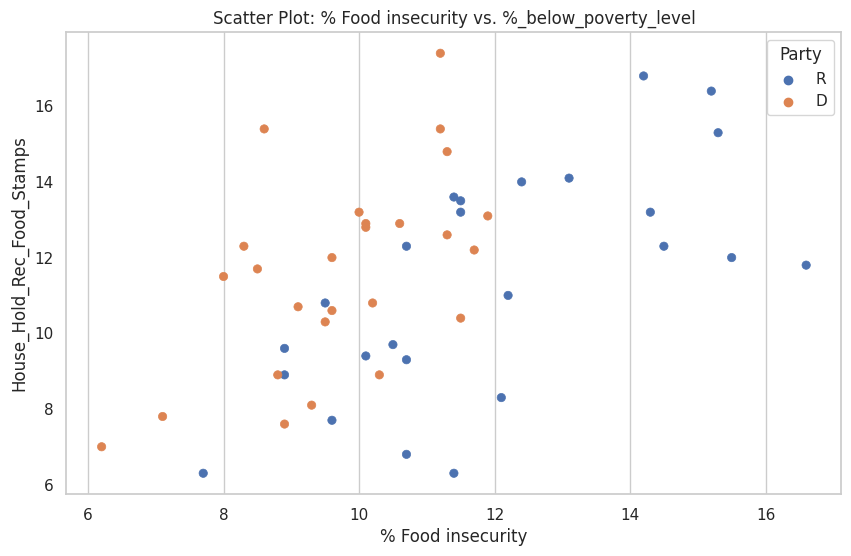

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Scatter plot with 'Male' and 'Female'
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
ax=sns.scatterplot(x='Food insecurity            ', y='House_Hold_Rec_Food_Stamps', data=df_sorted, hue='Party', edgecolor=None)
ax.yaxis.grid(False)

# Add labels and title
plt.xlabel('% Food insecurity')
plt.ylabel('House_Hold_Rec_Food_Stamps')
plt.title('Scatter Plot: % Food insecurity vs. %_below_poverty_level')

# Show the plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Scatter plot with 'Male' and 'Female'
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
ax=sns.scatterplot(x='Food insecurity            ', y='Per_below_poverty_level', data=df_sorted, hue='Party', edgecolor=None)
ax.yaxis.grid(False)

# Add labels and title
plt.xlabel('% Food insecurity')
plt.ylabel('%_below_poverty_level')
plt.title('Scatter Plot: % Food insecurity vs. %_below_poverty_level')

# Show the plot
plt.show()


<ipython-input-9-ec93a1365158>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=sex.index, y=sex.values, palette="viridis", ci=None, edgecolor=None)


Text(0.5, 1.0, 'Sex Groups')

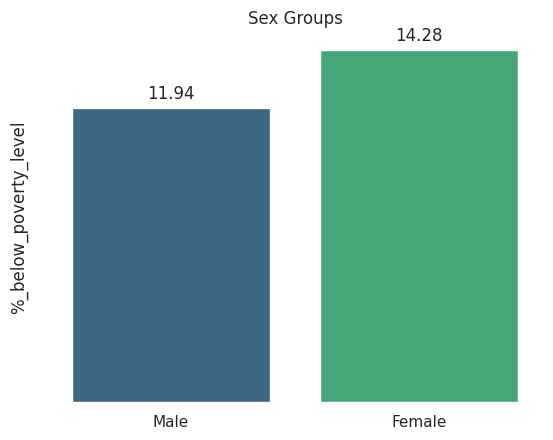

In [9]:
sex=df.agg({'Male': 'mean',
        'Female': 'mean'
})

sns.set_theme(style="whitegrid")
# Create a bar plot with annotations
ax = sns.barplot(x=age.index, y=age.values, palette="viridis", ci=None, edgecolor=None)
sns.despine(left=True, bottom=True)

for p in ax.patches:
    ax.annotate(f'{round(p.get_height(), 2)}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set(yticklabels=[])
ax.yaxis.grid(False)
# Add labels and title
plt.ylabel('%_below_poverty_level')
plt.title('Age Groups')

In [89]:
party=df_sorted.groupby('Party').agg({'Food insecurity            ': 'mean',
})

In [91]:
party.head()

,Food insecurity
Party,
D,9.726923
R,11.940000


In [94]:
sns.set_theme(style="whitegrid")
# Create a bar plot with annotations
ax = sns.barplot(x=party.index, y=party.values, edgecolor=None)
sns.despine(left=True, bottom=True)

for p in ax.patches:
    ax.annotate(f'{round(p.get_height(), 2)}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set(yticklabels=[])
ax.yaxis.grid(False)
# Add labels and title
plt.ylabel('%_below_poverty_level')
plt.title('Age Groups')

ValueError: ignored

In [10]:
age=df.agg({'<5_years': 'mean',
        '5-18_years': 'mean',
        '18-34_years': 'mean',
        '35-64_years': 'mean',
        '>65_years': 'mean'
})

<ipython-input-11-03959f27bc51>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=age.index, y=age.values, palette="viridis", ci=None, edgecolor=None)


Text(0.5, 1.0, 'Age Groups')

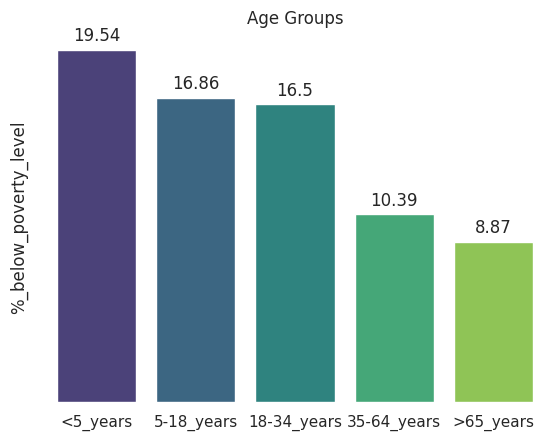

In [11]:
sns.set_theme(style="whitegrid")
# Create a bar plot with annotations
ax = sns.barplot(x=age.index, y=age.values, palette="viridis", ci=None, edgecolor=None)
sns.despine(left=True, bottom=True)

for p in ax.patches:
    ax.annotate(f'{round(p.get_height(), 2)}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set(yticklabels=[])
ax.yaxis.grid(False)
# Add labels and title
plt.ylabel('%_below_poverty_level')
plt.title('Age Groups')

In [11]:
sns.set_theme(style="whitegrid")
# Create a bar plot with annotations
ax = sns.barplot(x=age.index, y=age.values, palette="viridis", ci=None, edgecolor=None)
sns.despine(left=True, bottom=True)

for p in ax.patches:
    ax.annotate(f'{round(p.get_height(), 2)}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set(yticklabels=[])
ax.yaxis.grid(False)
# Add labels and title
plt.ylabel('%_below_poverty_level')
plt.title('Age Groups')